In [56]:
from gensim.models import Word2Vec
from gensim import models
import multiprocessing
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize, RegexpTokenizer
import multiprocessing
import re
import warnings
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nltk.download('punkt')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
indonesia = open('plain/ID.txt').read()
inggris = open('plain/EN.txt').read()

In [46]:
indonesia = indonesia.lower()
inggris = inggris.lower()

In [47]:
inggris[:250]

'minister of finance sri mulyani indrawati said that a sharp correction of the composite inde x by up to 4 pct in wedenesday?s trading was a mere temporary effect of regional factors like decline in plantation commodity prices and the financial crisis'

In [48]:
indonesia = re.sub(r'([0-9]+[\,\./])*[0-9]+',r' NUMBER ', indonesia)
inggris = re.sub(r'([0-9]+[\,\./])*[0-9]+',r' ANGKA ', inggris)
inggris[:1002]

'minister of finance sri mulyani indrawati said that a sharp correction of the composite inde x by up to  ANGKA  pct in wedenesday?s trading was a mere temporary effect of regional factors like decline in plantation commodity prices and the financial crisis in thailand.\nin a press briefing held at the ministry here on wedenesday evening, minister sri mulyani flanked by president director of the jakarta stock exchange jsx erry firmansyah said that some of the indonesian economic factors had improved, instead the inflation factor of foodstuffs will soon dissappear which is confirmed by rice prices in all the provinces.\nsri mulayani showed other factors, among others, the rupiah currency tended to strengthen, with a positive impact on the inflation.\nthis also happened to fuel oil prices.\nthe  ANGKA  state budget is so far in a good condition and the government would continue implementing sound policies to create consistency which encouraged investors.\nthe ministry?s data also showed 

In [49]:
indonesia[:500]

'menteri keuangan sri mulyani mengatakan koreksi tajam pada indeks harga saham gabungan ihsg hingga sekitar  NUMBER  persen dalam perdagangan rabu  NUMBER  hanya efek sesaat dari faktor-faktor regional seperti penurunan harga komoditi perkebunan dan krisis finansial di thailand. \ndalam jumpa pers bersama dirut bursa efek jakarta bej, erry firmansyah di gedung depkeu jakarta, rabu malam, menkeu menjelaskan beberapa faktor ekonomi indonesia justru membaik.\nkita melihat faktor inflasi dari makanan a'

In [50]:
# kalimat_indonesia = indonesia.split('\n')
tokenizer = RegexpTokenizer(r'([A-za-z]{1,})')
# hasil_tokenisasi = [word_tokenize(kalimat) for kalimat in kalimat_indonesia]
tokenisasi_indonesia = [tokenizer.tokenize(indonesia)]
tokenisasi_indonesia

[['menteri',
  'keuangan',
  'sri',
  'mulyani',
  'mengatakan',
  'koreksi',
  'tajam',
  'pada',
  'indeks',
  'harga',
  'saham',
  'gabungan',
  'ihsg',
  'hingga',
  'sekitar',
  'NUMBER',
  'persen',
  'dalam',
  'perdagangan',
  'rabu',
  'NUMBER',
  'hanya',
  'efek',
  'sesaat',
  'dari',
  'faktor',
  'faktor',
  'regional',
  'seperti',
  'penurunan',
  'harga',
  'komoditi',
  'perkebunan',
  'dan',
  'krisis',
  'finansial',
  'di',
  'thailand',
  'dalam',
  'jumpa',
  'pers',
  'bersama',
  'dirut',
  'bursa',
  'efek',
  'jakarta',
  'bej',
  'erry',
  'firmansyah',
  'di',
  'gedung',
  'depkeu',
  'jakarta',
  'rabu',
  'malam',
  'menkeu',
  'menjelaskan',
  'beberapa',
  'faktor',
  'ekonomi',
  'indonesia',
  'justru',
  'membaik',
  'kita',
  'melihat',
  'faktor',
  'inflasi',
  'dari',
  'makanan',
  'akan',
  'segera',
  'hilang',
  'yang',
  'terkonfirmasi',
  'dari',
  'harga',
  'beras',
  'di',
  'semua',
  'propinsi',
  'katanya',
  'demikian',
  'pula',
 

In [59]:
text = 'let''s have some fun!'
tokenizer.tokenize(text)

['lets', 'have', 'some', 'fun']

In [52]:
tokenisasi_inggris = [tokenizer.tokenize(inggris)]
tokenisasi_inggris

[['minister',
  'of',
  'finance',
  'sri',
  'mulyani',
  'indrawati',
  'said',
  'that',
  'a',
  'sharp',
  'correction',
  'of',
  'the',
  'composite',
  'inde',
  'x',
  'by',
  'up',
  'to',
  'ANGKA',
  'pct',
  'in',
  'wedenesday',
  's',
  'trading',
  'was',
  'a',
  'mere',
  'temporary',
  'effect',
  'of',
  'regional',
  'factors',
  'like',
  'decline',
  'in',
  'plantation',
  'commodity',
  'prices',
  'and',
  'the',
  'financial',
  'crisis',
  'in',
  'thailand',
  'in',
  'a',
  'press',
  'briefing',
  'held',
  'at',
  'the',
  'ministry',
  'here',
  'on',
  'wedenesday',
  'evening',
  'minister',
  'sri',
  'mulyani',
  'flanked',
  'by',
  'president',
  'director',
  'of',
  'the',
  'jakarta',
  'stock',
  'exchange',
  'jsx',
  'erry',
  'firmansyah',
  'said',
  'that',
  'some',
  'of',
  'the',
  'indonesian',
  'economic',
  'factors',
  'had',
  'improved',
  'instead',
  'the',
  'inflation',
  'factor',
  'of',
  'foodstuffs',
  'will',
  'soon'

In [53]:
SIZE=300

In [64]:
model_indonesia = Word2Vec(tokenisasi_indonesia, size=SIZE, window=5, min_count=5, workers=multiprocessing.cpu_count())
model_indonesia.save("model_indonesia.model")

In [65]:
model_inggris = Word2Vec(tokenisasi_inggris, size=SIZE, window=5, min_count=5, workers=multiprocessing.cpu_count())
model_inggris.save("model_inggris.model")

In [62]:
# model_indonesia = models.KeyedVectors.load_word2vec_format("model_indonesia.model", binary=True)
# model_inggris = models.KeyedVectors.load_word2vec_format("model_inggris.model", binary=True)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [66]:
total = 0
for kata in model_indonesia.wv.vocab:
    freq = model_indonesia.wv.vocab[kata].count
    if freq < 5: print(kata)
    total = total + freq
    
print(total)

480800


In [67]:
model_indonesia.most_similar('raja')

[('bni', 0.41305166482925415),
 ('kepala', 0.4058624505996704),
 ('dilakukan', 0.4043794870376587),
 ('oktober', 0.39936089515686035),
 ('semakin', 0.39775946736335754),
 ('tanker', 0.39767152070999146),
 ('tahunan', 0.3975638747215271),
 ('senilai', 0.39644455909729004),
 ('non', 0.3960679769515991),
 ('menyatakan', 0.3960339426994324)]

In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, copy=False, whiten=True)
# vektor_sederhana = pca.fit_transform(list_vektor_kata)

def plot(datas, labels, fc='yellow'):
    plt.subplots_adjust(bottom=0.1)
    plt.scatter(datas[:, 0], datas[:, 1], marker='o')
    
    for label, x, y, in zip(labels, datas[:, 0], datas[:, 1]):
        plt.annotate(label,
                    xy=(x,y),
                    xytext=(-15,15),
                    textcoords='offset points',
                    ha='right',
                    va='bottom',
                    bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        
    plt.show()


459
497
532
431
295
255
342


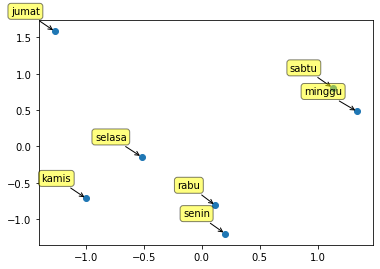

In [69]:
list_kata = [
    'senin',
    'selasa',
    'rabu',
    'kamis',
    'jumat',
    'sabtu',
    'minggu'
]

list_vektor_kata = np.array([model_indonesia[kata] for kata in list_kata])

for kata in list_kata:
    print(model_indonesia.wv.vocab[kata].count)

list_vektor_kata = pca.fit_transform(list_vektor_kata)
plot(list_vektor_kata, list_kata)

490
530
559
452
347
262
328


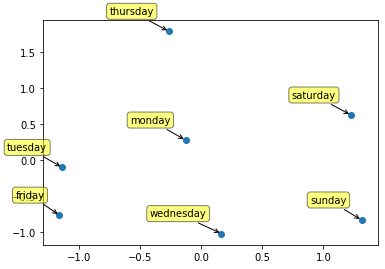

In [70]:
list_kata = [
    'monday',
    'tuesday',
    'wednesday',
    'thursday',
    'friday',
    'saturday',
    'sunday'
]

list_vektor_kata = np.array([model_inggris[kata] for kata in list_kata])

for kata in list_kata:
    print(model_inggris.wv.vocab[kata].count)

list_vektor_kata = pca.fit_transform(list_vektor_kata)
plot(list_vektor_kata, list_kata)

In [71]:
w2c = dict()
for item in model_indonesia.wv.vocab:
    w2c[item] = model_indonesia.wv.vocab[item].count
    
sorted_indonesia =dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
for i, item in enumerate(sorted_indonesia):
    print(i+1, item, sorted_indonesia[item])

1 NUMBER 17062
2 yang 14265
3 dan 10543
4 di 9664
5 pada 5861
6 dari 5529
7 dengan 5452
8 itu 5192
9 untuk 5146
10 dalam 4835
11 ini 4230
12 akan 3457
13 tersebut 2610
14 tidak 2603
15 mereka 2447
16 persen 2425
17 ke 2416
18 kata 2409
19 tahun 2301
20 rp 2013
21 as 1975
22 menjadi 1715
23 telah 1663
24 juga 1659
25 oleh 1638
26 lebih 1612
27 bahwa 1602
28 mengatakan 1570
29 karena 1526
30 setelah 1432
31 negara 1410
32 satu 1405
33 orang 1396
34 dapat 1352
35 pemerintah 1344
36 adalah 1322
37 atau 1307
38 saya 1273
39 ia 1265
40 sebagai 1225
41 indonesia 1221
42 dolar 1204
43 pertandingan 1193
44 atas 1189
45 bank 1164
46 saat 1157
47 kami 1155
48 dua 1150
49 kepada 1071
50 katanya 1064
51 ketika 1057
52 lalu 987
53 bisa 983
54 namun 981
55 bagi 957
56 secara 950
57 ada 936
58 pertama 923
59 para 918
60 besar 917
61 melakukan 912
62 tim 905
63 masih 900
64 kedua 887
65 mencapai 883
66 triliun 882
67 beberapa 875
68 terhadap 865
69 pemain 862
70 merupakan 847
71 sebesar 827
72 sebuah 8

600 membukukan 128
601 memperoleh 128
602 the 128
603 menyebabkan 128
604 hamas 128
605 berakhir 127
606 hak 127
607 antar 127
608 islam 127
609 tiba 127
610 lawan 127
611 wakil 126
612 pembiayaan 126
613 tahu 126
614 hukum 126
615 akhirnya 126
616 pemilihan 126
617 kerjasama 125
618 parlemen 125
619 kuartal 125
620 wanita 125
621 ilmuwan 125
622 semester 124
623 bumn 124
624 belanja 124
625 kesempatan 124
626 berjuang 124
627 penjaga 124
628 cadangan 123
629 belakang 122
630 dewan 121
631 kekerasan 121
632 timnya 121
633 jangka 120
634 nama 120
635 berharap 120
636 sulit 120
637 biasanya 120
638 a 119
639 sakit 119
640 apbn 118
641 muncul 118
642 merasa 118
643 fasilitas 117
644 level 117
645 tambahan 117
646 positif 117
647 raja 117
648 bila 117
649 penduduk 117
650 mengakhiri 117
651 bersenjata 117
652 agustus 116
653 menambah 116
654 pemegang 116
655 menyebutkan 116
656 mengakibatkan 116
657 undang 116
658 membuka 116
659 krisis 115
660 perjanjian 115
661 gubernur 115
662 penelitia

1570 hutan 45
1571 tuntutan 45
1572 jelasnya 45
1573 danau 45
1574 bertahap 45
1575 boleh 45
1576 besaran 45
1577 menjadikan 45
1578 berlanjut 45
1579 pelabuhan 45
1580 jiwa 45
1581 setahun 45
1582 bertanggung 45
1583 website 45
1584 lampu 45
1585 cheney 45
1586 isaf 45
1587 software 45
1588 digital 45
1589 dividen 44
1590 setara 44
1591 penarikan 44
1592 buah 44
1593 minus 44
1594 dinilai 44
1595 perpanjangan 44
1596 korupsi 44
1597 pribadi 44
1598 tanaman 44
1599 menggambarkan 44
1600 segala 44
1601 pengamat 44
1602 membuktikan 44
1603 demi 44
1604 peralihan 44
1605 menempati 44
1606 abad 44
1607 berfungsi 44
1608 layar 44
1609 angkasa 44
1610 besarnya 43
1611 kerajaan 43
1612 mengangkat 43
1613 bappenas 43
1614 mau 43
1615 kontribusi 43
1616 dananya 43
1617 piranti 43
1618 pasokan 43
1619 khawatir 43
1620 meksiko 43
1621 bersedia 43
1622 fenomena 43
1623 online 43
1624 hussein 43
1625 saksi 43
1626 indeks 42
1627 disampaikan 42
1628 pembangkit 42
1629 penyaluran 42
1630 memegang 42


2167 beruntun 30
2168 menjamu 30
2169 wenger 30
2170 par 30
2171 kuznetsova 30
2172 sebulan 29
2173 menyalurkan 29
2174 juru 29
2175 segi 29
2176 fitch 29
2177 tadi 29
2178 cgi 29
2179 melahirkan 29
2180 menko 29
2181 eksternal 29
2182 efisien 29
2183 instrumen 29
2184 tertekan 29
2185 sentimen 29
2186 pertamina 29
2187 pengolahan 29
2188 persiapan 29
2189 km 29
2190 olahraga 29
2191 berhubungan 29
2192 komentar 29
2193 pulih 29
2194 pipa 29
2195 andy 29
2196 banjir 29
2197 diminta 29
2198 ataupun 29
2199 sewaktu 29
2200 gula 29
2201 sengketa 29
2202 delegasi 29
2203 damai 29
2204 polusi 29
2205 memeriksa 29
2206 tv 29
2207 satuan 29
2208 pemungutan 29
2209 time 29
2210 nyaris 29
2211 hakim 29
2212 teror 29
2213 diserang 29
2214 teman 29
2215 perlawanan 29
2216 membaca 29
2217 gading 29
2218 tersingkir 29
2219 kotak 29
2220 pohon 29
2221 lintasan 29
2222 tottenham 29
2223 dortmund 29
2224 mari 28
2225 bali 28
2226 berjangka 28
2227 menanggapi 28
2228 tersebar 28
2229 paskah 28
2230 pas

2717 terapi 22
2718 middlesbrough 22
2719 dinosaurus 22
2720 biologis 22
2721 event 22
2722 menyerupai 22
2723 fulham 22
2724 terbawah 22
2725 gebrakan 22
2726 newcastle 22
2727 juve 22
2728 padi 21
2729 mortgage 21
2730 sehubungan 21
2731 wisata 21
2732 efisiensi 21
2733 bpr 21
2734 individu 21
2735 minoritas 21
2736 segmen 21
2737 koordinasi 21
2738 sekuritas 21
2739 adil 21
2740 dikemukakan 21
2741 mengawasi 21
2742 diberlakukan 21
2743 budaya 21
2744 rekening 21
2745 back 21
2746 rupslb 21
2747 kapan 21
2748 pengumuman 21
2749 melebar 21
2750 coba 21
2751 landasan 21
2752 financial 21
2753 kalender 21
2754 gresik 21
2755 ujung 21
2756 penyesuaian 21
2757 membahayakan 21
2758 seluruhnya 21
2759 sumur 21
2760 tanggapan 21
2761 orde 21
2762 memperluas 21
2763 meneliti 21
2764 bersatu 21
2765 pencegahan 21
2766 padang 21
2767 ruu 21
2768 dasarnya 21
2769 ide 21
2770 diproduksi 21
2771 lebar 21
2772 mempelajari 21
2773 dilengkapi 21
2774 derajat 21
2775 wajah 21
2776 berlawanan 21
2777 

3692 memindahkan 14
3693 rezim 14
3694 direktorat 14
3695 point 14
3696 keraguan 14
3697 memudahkan 14
3698 debt 14
3699 terpadu 14
3700 kamar 14
3701 mengecewakan 14
3702 macet 14
3703 pengendalian 14
3704 depannya 14
3705 ungkap 14
3706 dengar 14
3707 goreng 14
3708 center 14
3709 ditandai 14
3710 menemui 14
3711 lonjakan 14
3712 memperkenalkan 14
3713 daging 14
3714 pertukaran 14
3715 wp 14
3716 persegi 14
3717 mengoperasikan 14
3718 produktivitas 14
3719 limbah 14
3720 pikiran 14
3721 murni 14
3722 anggotanya 14
3723 istimewa 14
3724 berpenghasilan 14
3725 usd 14
3726 tujuannya 14
3727 yusuf 14
3728 inisiatif 14
3729 dilindungi 14
3730 kilo 14
3731 ktt 14
3732 elpiji 14
3733 prestasi 14
3734 memotong 14
3735 cisse 14
3736 meninjau 14
3737 keturunan 14
3738 pergantian 14
3739 simon 14
3740 melompat 14
3741 hilangnya 14
3742 mental 14
3743 melemparkan 14
3744 nabi 14
3745 mengakses 14
3746 bkd 14
3747 campur 14
3748 sukar 14
3749 mendasar 14
3750 suaminya 14
3751 tas 14
3752 richard 

4297 konsultan 11
4298 baiknya 11
4299 kalbe 11
4300 klbf 11
4301 power 11
4302 prediksi 11
4303 sembuh 11
4304 terdaftar 11
4305 jbic 11
4306 pidatonya 11
4307 peka 11
4308 modalnya 11
4309 lippo 11
4310 terganggu 11
4311 bauksit 11
4312 diinginkan 11
4313 pengangguran 11
4314 buta 11
4315 selular 11
4316 penggelaran 11
4317 lampung 11
4318 momentum 11
4319 kwartal 11
4320 denda 11
4321 menghapus 11
4322 boj 11
4323 penyumbang 11
4324 dipengaruhi 11
4325 akurat 11
4326 diraih 11
4327 kliring 11
4328 perilaku 11
4329 untung 11
4330 adapun 11
4331 pemerintahnya 11
4332 diatas 11
4333 memaparkan 11
4334 ketatnya 11
4335 diproyeksikan 11
4336 harinya 11
4337 samsung 11
4338 rig 11
4339 walau 11
4340 ketidakpastian 11
4341 semburan 11
4342 dibantu 11
4343 pemenuhan 11
4344 berkurangnya 11
4345 partisipasi 11
4346 bawang 11
4347 substansi 11
4348 sub 11
4349 disahkan 11
4350 oc 11
4351 runding 11
4352 memanggil 11
4353 matang 11
4354 pandang 11
4355 aziz 11
4356 henri 11
4357 mematuhi 11
43

4854 island 10
4855 tipsarevic 10
4856 benfica 10
4857 prix 10
4858 strasbourg 10
4859 kazim 10
4860 bulls 10
4861 primer 9
4862 berkomitmen 9
4863 penjelasannya 9
4864 berakibat 9
4865 dijamin 9
4866 vice 9
4867 president 9
4868 trust 9
4869 director 9
4870 ln 9
4871 instansi 9
4872 tangguh 9
4873 konsesi 9
4874 penjualannya 9
4875 hartadi 9
4876 disediakan 9
4877 draft 9
4878 membengkak 9
4879 idbbb 9
4880 profil 9
4881 pengadaan 9
4882 pencabutan 9
4883 merevisi 9
4884 bb 9
4885 pemulihan 9
4886 selaras 9
4887 ditempuh 9
4888 offer 9
4889 diperlemah 9
4890 moody 9
4891 guncangan 9
4892 mencermati 9
4893 tercermin 9
4894 drastis 9
4895 diatasi 9
4896 pengalihan 9
4897 equity 9
4898 terlepas 9
4899 waluyanto 9
4900 ana 9
4901 mengawal 9
4902 merosotnya 9
4903 diangkat 9
4904 memangkas 9
4905 inginkan 9
4906 antm 9
4907 hyun 9
4908 penerima 9
4909 difokuskan 9
4910 kingdom 9
4911 dialokasikan 9
4912 jatuhnya 9
4913 penanam 9
4914 memperingati 9
4915 private 9
4916 konfirmasi 9
4917 ida

5414 seksama 8
5415 teorinya 8
5416 asalnya 8
5417 kiloliter 8
5418 simbol 8
5419 legislatif 8
5420 esia 8
5421 sirkulasi 8
5422 pribumi 8
5423 tragedi 8
5424 membendung 8
5425 mencalonkan 8
5426 keringat 8
5427 liberal 8
5428 menimpa 8
5429 bukannya 8
5430 bertentangan 8
5431 eksistensi 8
5432 dipahami 8
5433 dihindari 8
5434 dipelajari 8
5435 fungsinya 8
5436 diletakkan 8
5437 dihubungkan 8
5438 mendasarkan 8
5439 kaitannya 8
5440 sragen 8
5441 terlantar 8
5442 lobato 8
5443 didakwa 8
5444 andre 8
5445 hamid 8
5446 mullah 8
5447 bob 8
5448 kehormatan 8
5449 pesisir 8
5450 tanduk 8
5451 dibenarkan 8
5452 khalilzad 8
5453 nasionalis 8
5454 montenegro 8
5455 hara 8
5456 berdoa 8
5457 mendalangi 8
5458 tertembak 8
5459 bersenjatakan 8
5460 suaka 8
5461 mengeluhkan 8
5462 rahim 8
5463 joe 8
5464 menyebarkan 8
5465 pemecahan 8
5466 sayuran 8
5467 mengingini 8
5468 jiabao 8
5469 menyalakan 8
5470 min 8
5471 levin 8
5472 bersikeras 8
5473 abc 8
5474 tutsi 8
5475 winston 8
5476 king 8
5477 mu

5999 judul 7
6000 pegiat 7
6001 ibrahim 7
6002 fadel 7
6003 butir 7
6004 diagnosa 7
6005 teratur 7
6006 kritik 7
6007 menunaikan 7
6008 diburu 7
6009 nairobi 7
6010 slowakia 7
6011 memboikot 7
6012 serbuk 7
6013 psp 7
6014 unhcr 7
6015 menerimanya 7
6016 guantanamo 7
6017 alamat 7
6018 berkelahi 7
6019 tibet 7
6020 atlanta 7
6021 tangki 7
6022 england 7
6023 russia 7
6024 pavel 7
6025 opium 7
6026 perhimpunan 7
6027 diaktifkan 7
6028 fars 7
6029 bulat 7
6030 brasil 7
6031 berulangkali 7
6032 alzheimer 7
6033 merangsang 7
6034 sebentar 7
6035 mahkota 7
6036 mengemudi 7
6037 balatentara 7
6038 letusan 7
6039 bersumpah 7
6040 menyangkal 7
6041 menempuh 7
6042 mahdi 7
6043 brown 7
6044 daniele 7
6045 mastrogiacomo 7
6046 gemuk 7
6047 komentarnya 7
6048 npt 7
6049 kejatuhan 7
6050 dideteksi 7
6051 edisi 7
6052 etiopia 7
6053 pasif 7
6054 sharafi 7
6055 fosfor 7
6056 amazon 7
6057 memisahkan 7
6058 mini 7
6059 imigran 7
6060 mutlak 7
6061 francesco 7
6062 puerto 7
6063 jong 7
6064 hafiz 7
60

6583 alvaro 6
6584 diselimuti 6
6585 meramalkan 6
6586 kelaparan 6
6587 brussels 6
6588 himalaya 6
6589 buangan 6
6590 janda 6
6591 diungsikan 6
6592 arsitek 6
6593 drama 6
6594 ratu 6
6595 blokade 6
6596 perlunya 6
6597 kesamaan 6
6598 mussa 6
6599 penerjemah 6
6600 institut 6
6601 febuari 6
6602 jintao 6
6603 balistik 6
6604 pesaingnya 6
6605 konstituen 6
6606 kembar 6
6607 se 6
6608 penyatuan 6
6609 kufuor 6
6610 rapuh 6
6611 berpatroli 6
6612 nara 6
6613 ould 6
6614 diktator 6
6615 menghirup 6
6616 terbaiknya 6
6617 propaganda 6
6618 florida 6
6619 vte 6
6620 dimakamkan 6
6621 tikrit 6
6622 dujail 6
6623 semasa 6
6624 dendam 6
6625 ramadi 6
6626 pemburu 6
6627 pranab 6
6628 press 6
6629 sonia 6
6630 ellison 6
6631 kismayo 6
6632 barre 6
6633 tetua 6
6634 menular 6
6635 dihalau 6
6636 ankara 6
6637 pelacuran 6
6638 selebar 6
6639 derita 6
6640 mena 6
6641 najaf 6
6642 dekatnya 6
6643 tembok 6
6644 ditinggalkan 6
6645 uzbekistan 6
6646 sasae 6
6647 hollywood 6
6648 pervez 6
6649 dala

7432 pemikir 5
7433 terpecah 5
7434 berpacu 5
7435 ulama 5
7436 pakta 5
7437 rasial 5
7438 disebarkan 5
7439 diperbarui 5
7440 kantornya 5
7441 bersebelahan 5
7442 ilanthiriyan 5
7443 diparkir 5
7444 supersonik 5
7445 terulangnya 5
7446 noto 5
7447 bam 5
7448 menyukai 5
7449 memaafkan 5
7450 junichiro 5
7451 kelainan 5
7452 diabetes 5
7453 kolonial 5
7454 zebari 5
7455 diundang 5
7456 mengkritik 5
7457 dewa 5
7458 pendahuluan 5
7459 mengijinkan 5
7460 hillary 5
7461 kadyrov 5
7462 ambisius 5
7463 antihuru 5
7464 pengangkut 5
7465 paktiawal 5
7466 taha 5
7467 moldova 5
7468 nikaragua 5
7469 dekrit 5
7470 missouri 5
7471 dibalik 5
7472 logis 5
7473 unison 5
7474 bertetangga 5
7475 menerjang 5
7476 alabama 5
7477 county 5
7478 ibunya 5
7479 suami 5
7480 kesehatannya 5
7481 menindak 5
7482 peluncur 5
7483 berhari 5
7484 dibekukan 5
7485 syahid 5
7486 menyusuri 5
7487 perenang 5
7488 memutus 5
7489 didekati 5
7490 bmw 5
7491 anasir 5
7492 buang 5
7493 pertunjukan 5
7494 hamil 5
7495 larriva

In [72]:
w2c = dict()
for item in model_inggris.wv.vocab:
    w2c[item] = model_inggris.wv.vocab[item].count
    
sorted_inggris = dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))
for i, item in enumerate(sorted_inggris):
    print(i+1, item, sorted_inggris[item])

1 the 37072
2 ANGKA 16311
3 of 15598
4 to 14906
5 in 14013
6 and 11330
7 a 10882
8 said 5872
9 on 5773
10 s 4983
11 is 4814
12 that 4282
13 for 4186
14 was 3760
15 with 3552
16 by 3487
17 from 3281
18 as 3126
19 at 3092
20 he 3055
21 it 2920
22 be 2636
23 this 2238
24 percent 2216
25 are 2010
26 which 1980
27 will 1968
28 has 1962
29 an 1898
30 rp 1878
31 have 1857
32 not 1775
33 were 1754
34 its 1694
35 had 1685
36 year 1619
37 but 1528
38 us 1521
39 their 1462
40 after 1449
41 bank 1436
42 would 1418
43 we 1409
44 his 1370
45 they 1363
46 also 1282
47 government 1240
48 two 1208
49 or 1188
50 first 1183
51 who 1128
52 been 1123
53 i 1118
54 one 1117
55 last 1032
56 indonesia 1015
57 when 957
58 can 951
59 up 933
60 state 898
61 more 888
62 trillion 835
63 other 806
64 there 769
65 people 764
66 time 751
67 pt 745
68 so 740
69 world 740
70 only 739
71 rate 728
72 over 721
73 than 709
74 second 707
75 all 701
76 billion 698
77 three 697
78 out 694
79 into 690
80 new 658
81 minister 648

1009 civilians 68
1010 saddam 68
1011 nigeria 68
1012 flight 67
1013 paid 67
1014 vehicle 67
1015 mandiri 67
1016 ratio 67
1017 reaching 67
1018 designed 67
1019 tokyo 67
1020 weekend 67
1021 advantage 67
1022 certainly 67
1023 suspected 67
1024 fight 67
1025 send 67
1026 goalkeeper 67
1027 facilities 66
1028 included 66
1029 maintain 66
1030 ready 66
1031 systems 66
1032 formed 66
1033 example 66
1034 reserves 66
1035 allowed 66
1036 distribution 66
1037 bni 66
1038 required 66
1039 electric 66
1040 st 66
1041 gaza 66
1042 temperature 66
1043 stability 65
1044 question 65
1045 besides 65
1046 turn 65
1047 ltd 65
1048 related 65
1049 occurred 65
1050 de 65
1051 forced 65
1052 coming 65
1053 italy 65
1054 themselves 65
1055 struck 65
1056 animals 65
1057 header 65
1058 getafe 65
1059 export 64
1060 grew 64
1061 family 64
1062 york 64
1063 accused 64
1064 bps 64
1065 negotiations 64
1066 becomes 64
1067 island 64
1068 saudi 64
1069 spain 64
1070 training 64
1071 shiite 64
1072 kick 64
10

1573 located 42
1574 view 42
1575 block 42
1576 helped 42
1577 reserve 42
1578 mega 42
1579 responsibility 42
1580 winners 42
1581 join 42
1582 god 42
1583 arrived 42
1584 interesting 42
1585 generation 42
1586 seeking 42
1587 victims 42
1588 uses 42
1589 act 42
1590 knowledge 42
1591 congress 42
1592 mfi 42
1593 civilian 42
1594 terrorist 42
1595 dutch 42
1596 medical 42
1597 kilometres 42
1598 tanks 42
1599 mutations 42
1600 confidence 41
1601 enterprises 41
1602 direction 41
1603 monitor 41
1604 greenback 41
1605 dpr 41
1606 eyes 41
1607 atmosphere 41
1608 measures 41
1609 covered 41
1610 accept 41
1611 moreover 41
1612 selection 41
1613 argentina 41
1614 nothing 41
1615 substitute 41
1616 self 41
1617 backed 41
1618 aircraft 41
1619 numbers 41
1620 reaction 41
1621 creature 41
1622 lives 41
1623 ethiopian 41
1624 islamists 41
1625 heat 41
1626 clash 41
1627 tehran 41
1628 barca 41
1629 transportation 40
1630 individual 40
1631 technical 40
1632 changed 40
1633 legal 40
1634 payment

2635 story 23
2636 jordan 23
2637 ll 23
2638 roadside 23
2639 ceasefire 23
2640 winter 23
2641 music 23
2642 love 23
2643 occupied 23
2644 cameroon 23
2645 diego 23
2646 crime 23
2647 sacked 23
2648 activists 23
2649 boss 23
2650 portuguese 23
2651 weapon 23
2652 sealed 23
2653 rafael 23
2654 inspired 23
2655 fan 23
2656 pair 23
2657 experiment 23
2658 laughing 23
2659 laptops 23
2660 pitch 23
2661 referee 23
2662 championships 23
2663 zaragoza 23
2664 henin 23
2665 fulham 23
2666 juve 23
2667 standings 23
2668 resident 22
2669 ask 22
2670 taiwan 22
2671 agenda 22
2672 raw 22
2673 obtain 22
2674 settle 22
2675 delegation 22
2676 engaged 22
2677 rebound 22
2678 culture 22
2679 forest 22
2680 manage 22
2681 funded 22
2682 employee 22
2683 represented 22
2684 quick 22
2685 participation 22
2686 cooperative 22
2687 pulp 22
2688 heard 22
2689 depends 22
2690 controlling 22
2691 hotel 22
2692 careful 22
2693 thayib 22
2694 joining 22
2695 assumptions 22
2696 succeed 22
2697 subscribers 22
26

3220 resume 18
3221 friend 18
3222 kenya 18
3223 gmt 18
3224 extremists 18
3225 reconciliation 18
3226 delhi 18
3227 mortar 18
3228 blair 18
3229 jail 18
3230 jewish 18
3231 stepped 18
3232 journal 18
3233 burns 18
3234 ethnic 18
3235 genocide 18
3236 dawn 18
3237 talking 18
3238 explosions 18
3239 jersey 18
3240 iaea 18
3241 male 18
3242 preventing 18
3243 knew 18
3244 kabul 18
3245 catch 18
3246 elbaradei 18
3247 ancient 18
3248 ltte 18
3249 grenades 18
3250 definitely 18
3251 ite 18
3252 collapsed 18
3253 ireland 18
3254 kilometers 18
3255 contest 18
3256 struggled 18
3257 sanchez 18
3258 tree 18
3259 flower 18
3260 hydrocarbon 18
3261 fungi 18
3262 tissues 18
3263 woods 18
3264 koeman 18
3265 athletic 18
3266 valladolid 18
3267 debut 18
3268 davenport 18
3269 girondins 18
3270 playmaker 18
3271 vfl 18
3272 miami 18
3273 cottbus 18
3274 malaysian 17
3275 zealand 17
3276 conducting 17
3277 paskah 17
3278 spring 17
3279 earnings 17
3280 antara 17
3281 slowdown 17
3282 cited 17
3283 su

3800 ahmad 14
3801 grown 14
3802 negotiating 14
3803 stakes 14
3804 spend 14
3805 absolutely 14
3806 lippo 14
3807 indication 14
3808 investments 14
3809 inflow 14
3810 governmental 14
3811 swap 14
3812 doha 14
3813 calm 14
3814 factory 14
3815 v 14
3816 unchanged 14
3817 behavior 14
3818 poultry 14
3819 seeds 14
3820 shift 14
3821 offset 14
3822 centers 14
3823 rubber 14
3824 congressional 14
3825 prompting 14
3826 fastest 14
3827 solutions 14
3828 quoting 14
3829 yearly 14
3830 formally 14
3831 greatest 14
3832 views 14
3833 understood 14
3834 welcome 14
3835 coverage 14
3836 announce 14
3837 settled 14
3838 organized 14
3839 thirty 14
3840 essential 14
3841 promises 14
3842 qualified 14
3843 roles 14
3844 conservative 14
3845 prove 14
3846 disappointment 14
3847 investigators 14
3848 turning 14
3849 tasks 14
3850 passenger 14
3851 railway 14
3852 tomorrow 14
3853 ranks 14
3854 regarded 14
3855 investigate 14
3856 rush 14
3857 restrictions 14
3858 feared 14
3859 convert 14
3860 colla

4328 wearing 12
4329 mayor 12
4330 frozen 12
4331 assassination 12
4332 bloodshed 12
4333 chennai 12
4334 downtown 12
4335 gathered 12
4336 hosni 12
4337 pelosi 12
4338 helps 12
4339 respiratory 12
4340 dpa 12
4341 attacker 12
4342 chaos 12
4343 native 12
4344 split 12
4345 mdc 12
4346 teachers 12
4347 frontier 12
4348 physically 12
4349 younger 12
4350 cnn 12
4351 knows 12
4352 cuba 12
4353 georgia 12
4354 crowded 12
4355 leftist 12
4356 disappeared 12
4357 crushed 12
4358 lasting 12
4359 stance 12
4360 diplomats 12
4361 snatched 12
4362 kidnapping 12
4363 briton 12
4364 xinhua 12
4365 mouth 12
4366 clot 12
4367 aso 12
4368 habitat 12
4369 communities 12
4370 defend 12
4371 bag 12
4372 zia 12
4373 peru 12
4374 appearances 12
4375 musharraf 12
4376 deliver 12
4377 voice 12
4378 prof 12
4379 kilograms 12
4380 catalyst 12
4381 burned 12
4382 thrown 12
4383 numerous 12
4384 aspirin 12
4385 coincidence 12
4386 hepatitis 12
4387 lights 12
4388 peron 12
4389 athens 12
4390 survived 12
4391 a

4923 knowing 10
4924 separated 10
4925 motivation 10
4926 msmb 10
4927 smallest 10
4928 channels 10
4929 vegetables 10
4930 joseph 10
4931 gunship 10
4932 hear 10
4933 bloody 10
4934 kandahar 10
4935 celebrated 10
4936 refusal 10
4937 neighbours 10
4938 rwanda 10
4939 criticised 10
4940 afterwards 10
4941 birthday 10
4942 slammed 10
4943 breathing 10
4944 images 10
4945 introduce 10
4946 ambush 10
4947 pleaded 10
4948 allegations 10
4949 meles 10
4950 papers 10
4951 watchdog 10
4952 techniques 10
4953 engineers 10
4954 ripped 10
4955 governing 10
4956 yemen 10
4957 min 10
4958 returns 10
4959 insists 10
4960 prize 10
4961 clinton 10
4962 motivated 10
4963 convicted 10
4964 organisations 10
4965 resort 10
4966 petersburg 10
4967 landing 10
4968 ulfa 10
4969 separatist 10
4970 homeland 10
4971 manhattan 10
4972 hostile 10
4973 beckett 10
4974 loyal 10
4975 renounce 10
4976 jets 10
4977 batticaloa 10
4978 footage 10
4979 suspect 10
4980 angry 10
4981 lions 10
4982 staged 10
4983 slogans 1

5916 viruses 8
5917 transform 8
5918 onions 8
5919 chip 8
5920 apps 8
5921 ancestors 8
5922 steroid 8
5923 feather 8
5924 trilobites 8
5925 describes 8
5926 bats 8
5927 miraculous 8
5928 competitions 8
5929 snakes 8
5930 browser 8
5931 sonar 8
5932 compare 8
5933 reproductive 8
5934 inch 8
5935 cpu 8
5936 frog 8
5937 punched 8
5938 saturnus 8
5939 static 8
5940 spaceship 8
5941 pluto 8
5942 displayed 8
5943 jumps 8
5944 rested 8
5945 keyboard 8
5946 teeth 8
5947 butterflies 8
5948 amateur 8
5949 flagellum 8
5950 warren 8
5951 miller 8
5952 clever 8
5953 vertebrate 8
5954 scorer 8
5955 juande 8
5956 bartoli 8
5957 tommy 8
5958 sidelined 8
5959 milwaukee 8
5960 celtics 8
5961 cole 8
5962 superbly 8
5963 victories 8
5964 hilton 8
5965 lebron 8
5966 didier 8
5967 terry 8
5968 lampard 8
5969 capello 8
5970 capdevila 8
5971 miroslav 8
5972 cornet 8
5973 gregory 8
5974 xavi 8
5975 sebastien 8
5976 grabbed 8
5977 lionel 8
5978 alex 8
5979 ferguson 8
5980 canas 8
5981 trafford 8
5982 demirel 8


6755 visas 6
6756 aneka 6
6757 medan 6
6758 manado 6
6759 mediation 6
6760 laying 6
6761 certification 6
6762 mt 6
6763 fleet 6
6764 catching 6
6765 bbia 6
6766 nasional 6
6767 surveyed 6
6768 violated 6
6769 halting 6
6770 towns 6
6771 citarum 6
6772 garbage 6
6773 convenient 6
6774 recreational 6
6775 touching 6
6776 allen 6
6777 nominated 6
6778 sgro 6
6779 awaiting 6
6780 propose 6
6781 flooding 6
6782 ore 6
6783 thereby 6
6784 permission 6
6785 promoting 6
6786 ceramic 6
6787 lawmaker 6
6788 tyre 6
6789 radial 6
6790 servicemen 6
6791 joachim 6
6792 concessional 6
6793 jimmy 6
6794 superiority 6
6795 sparking 6
6796 accompanying 6
6797 inform 6
6798 tata 6
6799 maxis 6
6800 bts 6
6801 strongest 6
6802 cylinders 6
6803 selecting 6
6804 persistent 6
6805 prompt 6
6806 enhanced 6
6807 suited 6
6808 excl 6
6809 ravaged 6
6810 sink 6
6811 reporting 6
6812 heavier 6
6813 albeit 6
6814 injected 6
6815 exploitation 6
6816 worsening 6
6817 inevitable 6
6818 granite 6
6819 duration 6
6820 a

7763 drama 5
7764 empire 5
7765 projectiles 5
7766 noise 5
7767 authorization 5
7768 invade 5
7769 modification 5
7770 horizon 5
7771 unified 5
7772 interrogated 5
7773 bizimungu 5
7774 rwandan 5
7775 jaish 5
7776 uzbek 5
7777 hosseini 5
7778 mounted 5
7779 representation 5
7780 sadc 5
7781 voting 5
7782 sweep 5
7783 fence 5
7784 contradiction 5
7785 kidnappers 5
7786 lawless 5
7787 departments 5
7788 dynamite 5
7789 invaded 5
7790 outskirts 5
7791 aides 5
7792 radars 5
7793 retreat 5
7794 raging 5
7795 mr 5
7796 transferring 5
7797 branded 5
7798 astronaut 5
7799 orlando 5
7800 confront 5
7801 inflammation 5
7802 designate 5
7803 secular 5
7804 occupy 5
7805 slavery 5
7806 negligence 5
7807 nutritious 5
7808 buenos 5
7809 aires 5
7810 poachers 5
7811 claws 5
7812 thinner 5
7813 males 5
7814 endangered 5
7815 shoot 5
7816 chanted 5
7817 unrelated 5
7818 manmohan 5
7819 passport 5
7820 mistress 5
7821 ellison 5
7822 throat 5
7823 shelling 5
7824 identities 5
7825 brigadier 5
7826 slovak

In [73]:
from gensim.models.translation_matrix import TranslationMatrix

In [74]:
word_pairs = [
    ("dan", "and"),
    ("dengan", "with"),
    ("itu", "that"),
    ("untuk", "for"),
    ("ini", "this"),
    ("akan", "will"),
    ("persen", "percent"),
    ("tahun", "year"),
    ("lebih", "more"),
    ("karena", "because"),
    ("setelah", "after"),
    ("negara", "country"),
    ("satu", "one"),
    ("pemerintah", "government"),
    ("atau", "or"),
    ("sebagai", "as"),
    ("indonesia", "indonesia"),
    ("dolar", "dollar"),
    ("pertandingan", "match"),
    ("bank", "bank"),
    ("dua", "two"),
    ("namun", "but"),
    ("pertama", "first"),
    ("besar", "big"),
    ("tim", "team"),
    ("masih", "still"),
    ("kedua", "second"),
    ("triliun", "trillion"),
    ("pemain", "player"),
    ("dunia", "world"),
    ("lain", "other"),
    ("baru", "new"),
    ("hanya", "only"),
    ("miliar", "billion"),
    ("jakarta", "jakarta"),
    ("angka", "number"),
    ("sangat", "very"),
    ("ekonomi", "economy"),
    ("pasar", "market"),
    ("tiga", "three")
]

In [75]:
vektor_translasi = TranslationMatrix(model_indonesia, model_inggris)

In [76]:
vektor_translasi.train(word_pairs)

ValueError: too many values to unpack (expected 2)

In [ ]:
vektor